In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


UPLOAD DATA

In [ ]:
from google.colab import files

# Télécharger les fichiers manuellement
uploaded = files.upload()


Saving Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main.zip to Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main.zip


**Extraction ZIP**

In [ ]:
import zipfile
import os

# Path to the zip file
zip_path = "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main.zip"

# Extraction directory (will create in current Colab workspace)
extract_to = "/content/drive/MyDrive/"

# Extract the main zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction completed successfully!")

Extraction completed successfully!


VERIFIER LES SIZES DES IMAGES

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

def analyze_dataset(folder_path):
    variations = {
        'shapes': set(),
        'color_channels': set(),
        'pixel_ranges': set(),
        'brightness': []
    }

    for root, _, files in os.walk(folder_path):
        for file in tqdm(files, desc="Analyzing"):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)

                if img is not None:
                    variations['shapes'].add(img.shape)
                    variations['color_channels'].add(img.shape[2] if len(img.shape) == 3 else 1)
                    variations['pixel_ranges'].add((img.min(), img.max()))
                    variations['brightness'].append(np.mean(img))

    print("\n=== Dataset Summary ===")
    print(f"Shapes: {variations['shapes']}")
    print(f"Color channels: {variations['color_channels']}")
    print(f"Pixel ranges: {variations['pixel_ranges']}")
    print(f"Avg brightness: {np.mean(variations['brightness']):.1f} ± {np.std(variations['brightness']):.1f}")

# Run on your folders
analyze_dataset('/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/train')
analyze_dataset('/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/test')

Analyzing: 0it [00:00, ?it/s]
Analyzing: 100%|██████████| 155/155 [00:01<00:00, 112.28it/s]



=== Dataset Summary ===
Shapes: {(224, 371, 3), (310, 413, 3), (247, 423, 3), (286, 327, 3), (267, 376, 3), (268, 341, 3), (313, 427, 3), (297, 427, 3), (291, 396, 3), (263, 385, 3), (324, 370, 3), (275, 442, 3), (325, 380, 3), (244, 351, 3), (280, 388, 3), (273, 372, 3), (192, 263, 3), (252, 466, 3), (220, 410, 3), (212, 369, 3), (298, 405, 3), (200, 252, 3), (260, 352, 3), (220, 361, 3), (302, 432, 3), (259, 395, 3), (462, 586, 3), (261, 430, 3), (288, 449, 3), (255, 426, 3), (221, 401, 3), (243, 420, 3), (317, 432, 3), (274, 350, 3), (295, 390, 3), (110, 172, 3), (341, 441, 3), (263, 397, 3), (244, 392, 3), (229, 366, 3), (191, 419, 3), (256, 421, 3), (144, 172, 3), (193, 403, 3), (253, 375, 3), (323, 417, 3), (245, 345, 3), (251, 381, 3), (213, 423, 3), (258, 338, 3), (259, 368, 3), (249, 423, 3), (291, 429, 3), (299, 438, 3), (243, 363, 3), (292, 410, 3), (302, 424, 3), (263, 380, 3), (280, 315, 3), (311, 418, 3), (253, 406, 3), (329, 434, 3), (292, 383, 3), (196, 385, 3), (356, 

Analyzing: 0it [00:00, ?it/s]
Analyzing: 100%|██████████| 90/90 [00:00<00:00, 101.86it/s]


=== Dataset Summary ===
Shapes: {(323, 420, 3), (250, 448, 3), (326, 465, 3), (339, 485, 3), (409, 468, 3), (372, 406, 3), (279, 414, 3), (334, 439, 3), (280, 409, 3), (292, 413, 3), (340, 443, 3), (353, 480, 3), (334, 419, 3), (337, 434, 3), (319, 447, 3), (347, 445, 3), (284, 417, 3), (328, 464, 3), (332, 468, 3), (353, 429, 3), (286, 397, 3), (279, 471, 3), (314, 395, 3), (336, 496, 3), (260, 439, 3), (309, 471, 3), (351, 414, 3), (355, 408, 3), (264, 484, 3), (365, 422, 3), (417, 483, 3), (383, 461, 3), (332, 474, 3), (341, 415, 3), (329, 450, 3), (330, 445, 3), (347, 475, 3), (317, 419, 3), (314, 438, 3), (356, 443, 3), (251, 371, 3), (274, 491, 3), (296, 427, 3), (341, 417, 3), (322, 411, 3), (322, 409, 3), (325, 448, 3), (335, 486, 3), (342, 489, 3), (367, 478, 3), (285, 429, 3), (330, 447, 3), (300, 435, 3), (263, 360, 3), (314, 429, 3), (320, 420, 3), (302, 384, 3), (331, 430, 3), (331, 485, 3), (310, 383, 3), (346, 444, 3), (349, 494, 3), (373, 450, 3), (339, 439, 3), (500, 

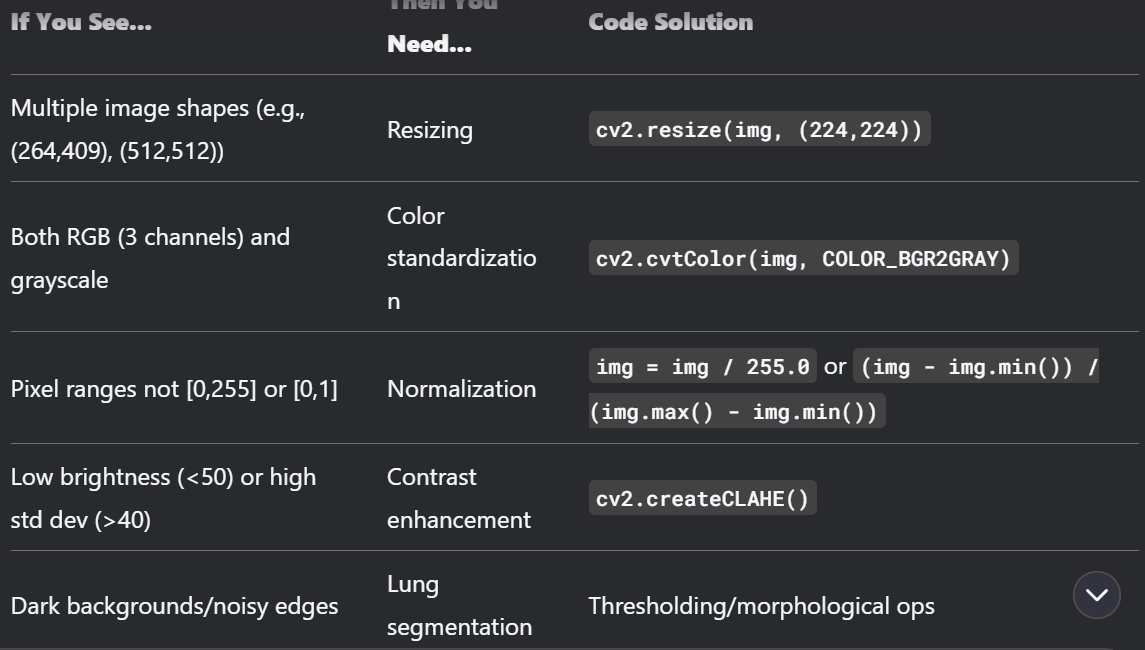

**AFFICHAGE LES IMAGES **

Sample images from each class:


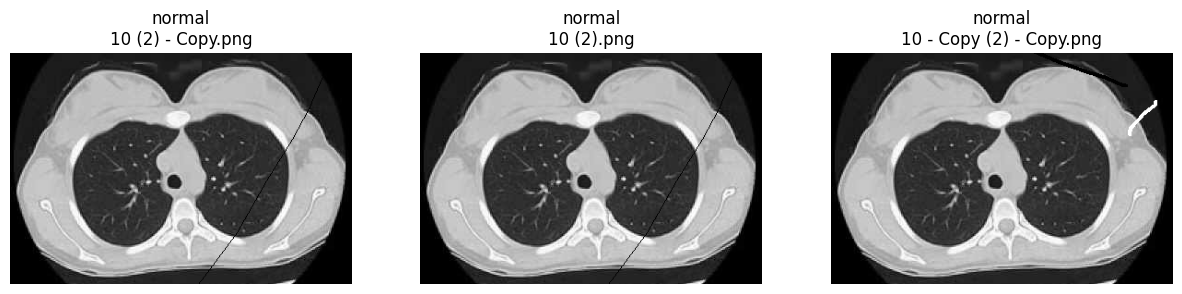

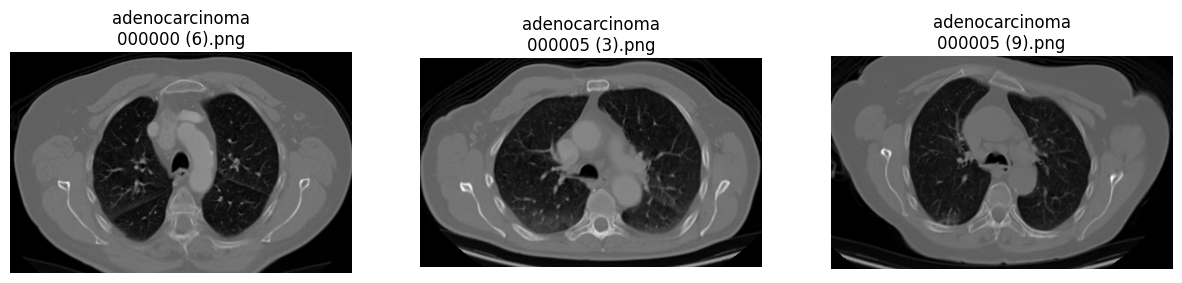

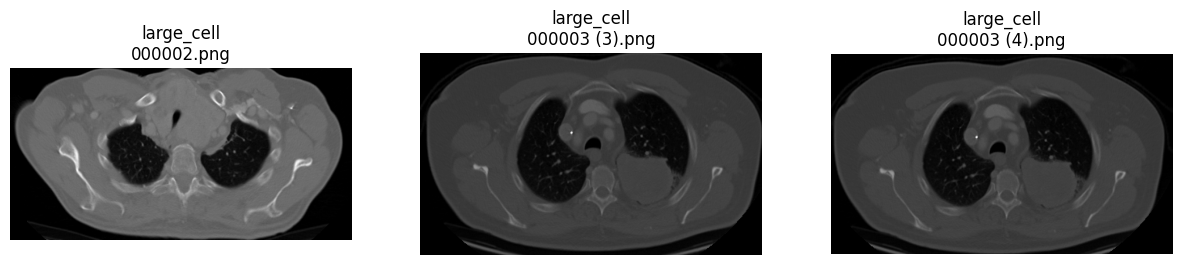

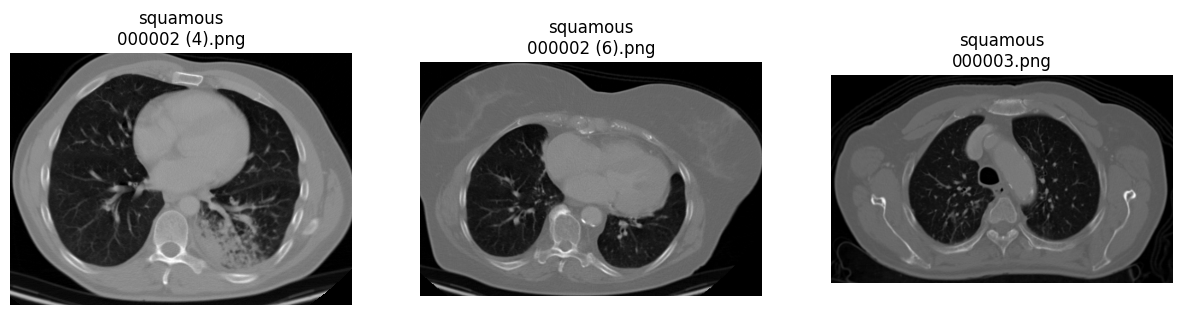

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # for progress bar

# Define paths
base_path = '/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset'
train_folder = os.path.join(base_path, 'train')
test_folder = os.path.join(base_path, 'test')
validate_folder = os.path.join(base_path, 'valid')

# Class folders (relative to train/test/valid folders)
class_folders = {
    'normal': 'normal',
    'adenocarcinoma': 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
    'large_cell': 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
    'squamous': 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
}

def display_sample_images(folder_path, class_name, num_samples=3):
    """
    Display sample images from a specific class folder
    """
    class_path = os.path.join(folder_path, class_folders[class_name])
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    plt.figure(figsize=(15, 5))
    for i in range(min(num_samples, len(image_files))):
        img_path = os.path.join(class_path, image_files[i])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"{class_name}\n{image_files[i]}")
        plt.axis('off')
    plt.show()


# 1. First visualize samples from each class
print("Sample images from each class:")
for class_name in class_folders.keys():
    display_sample_images(train_folder, class_name)



Why This Works for Your Data
Grayscale Conversion

Your models don't need RGB for lung analysis

Reduces memory usage by 66%

Smart Resizing

Preserves nodule aspect ratios (critical for cancer detection)

Pads with black instead of distorting features

CLAHE Enhancement

Compensates for brightness variations (your std dev was ~33)

Reveals subtle tissue differences

Efficient Storage

Saves as .npy files for faster loading during training

**PREPROCESSING**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm  # For progress bars

# Define paths
base_path = '/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset'
train_folder = os.path.join(base_path, 'train')
test_folder = os.path.join(base_path, 'test')
processed_train = os.path.join(base_path, 'processed_train')  # New folder for processed train
processed_test = os.path.join(base_path, 'processed_test')    # New folder for processed test
# Add validation folder paths
valid_folder = os.path.join(base_path, 'valid')  # Assuming you have a 'valid' folder
processed_valid = os.path.join(base_path, 'processed_valid')  # New folder for processed validation


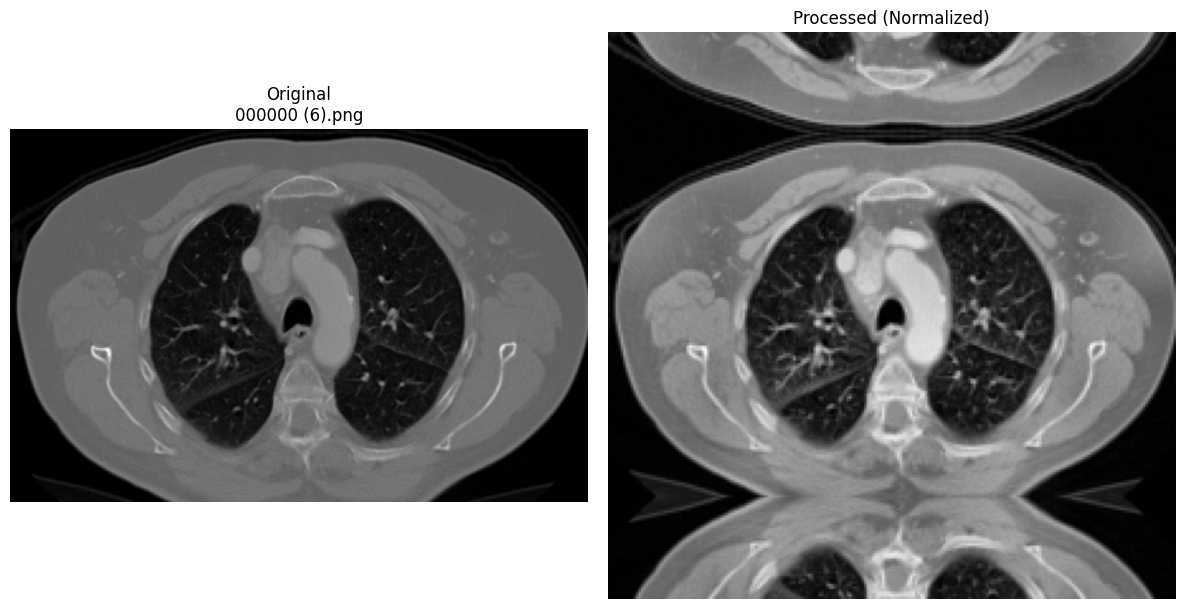


Processing training set...


Processing .: 0it [00:00, ?it/s]
Processing adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib: 100%|██████████| 195/195 [00:06<00:00, 30.21it/s]
Processing large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa: 100%|██████████| 115/115 [00:04<00:00, 26.85it/s]
Processing normal: 100%|██████████| 148/148 [00:11<00:00, 12.95it/s]
Processing squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa: 100%|██████████| 155/155 [00:04<00:00, 33.20it/s]



Processing test set...


Processing .: 0it [00:00, ?it/s]
Processing squamous.cell.carcinoma: 100%|██████████| 90/90 [00:35<00:00,  2.55it/s]


Preprocessing complete!
Train images saved to: /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train
Test images saved to: /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test


In [ ]:

# Create output directories
os.makedirs(processed_train, exist_ok=True)
os.makedirs(processed_test, exist_ok=True)

def preprocess_lung_image(img_path, target_size=(224, 224)):
    """Enhanced preprocessing with better padding handling"""
    img = cv2.imread(img_path)
    if img is None:
        print(f"Warning: Could not read {img_path}")
        return None, None

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # CLAHE with adaptive clip limit based on image brightness
    mean_brightness = np.mean(gray)
    clip_limit = 2.0 if mean_brightness < 100 else 1.5  # More aggressive for darker images
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    # Smart resizing with aspect ratio preservation
    h, w = enhanced.shape
    scale = min(target_size[0]/h, target_size[1]/w)
    new_h, new_w = int(h*scale), int(w*scale)
    resized = cv2.resize(enhanced, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # Padding with reflection for better edge handling
    pad_top = (target_size[0] - new_h) // 2
    pad_bottom = target_size[0] - new_h - pad_top
    pad_left = (target_size[1] - new_w) // 2
    pad_right = target_size[1] - new_w - pad_left

    padded = cv2.copyMakeBorder(resized,
                              pad_top, pad_bottom,
                              pad_left, pad_right,
                              cv2.BORDER_REFLECT101,
                              value=[0])

    # Normalization with epsilon to avoid division by zero
    normalized = (padded - padded.min()) / (padded.max() - padded.min() + 1e-7)

    return img, normalized

def process_and_save_dataset(src_folder, dst_folder):
    """Process entire dataset with progress tracking"""
    for root, dirs, files in os.walk(src_folder):
        # Create mirror directory structure in destination
        rel_path = os.path.relpath(root, src_folder)
        dst_root = os.path.join(dst_folder, rel_path)
        os.makedirs(dst_root, exist_ok=True)

        # Process files with progress bar
        for file in tqdm(files, desc=f"Processing {rel_path}"):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                src_path = os.path.join(root, file)
                dst_path = os.path.join(dst_root, file)

                try:
                    _, processed = preprocess_lung_image(src_path)
                    if processed is not None:
                        # Save as PNG to avoid compression artifacts
                        cv2.imwrite(dst_path, (processed * 255).astype(np.uint8))
                except Exception as e:
                    print(f"Error processing {src_path}: {str(e)}")

# Visual verification
sample_path = os.path.join(train_folder, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000000 (6).png')
if os.path.exists(sample_path):
    original, processed = preprocess_lung_image(sample_path)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(f"Original\n{os.path.basename(sample_path)}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(processed, cmap='gray', vmin=0, vmax=1)
    plt.title("Processed (Normalized)")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print(f"Sample image not found at {sample_path}")

# Process datasets
print("\nProcessing training set...")
process_and_save_dataset(train_folder, processed_train)

print("\nProcessing test set...")
process_and_save_dataset(test_folder, processed_test)


print("\nPreprocessing complete!")
print(f"Train images saved to: {processed_train}")
print(f"Test images saved to: {processed_test}")

In [ ]:

# Create validation output directory
os.makedirs(processed_valid, exist_ok=True)

# Process validation set (using the same function as test/train)
print("\nProcessing validation set...")
process_and_save_dataset(valid_folder, processed_valid)

print(f"Validation images saved to: {processed_valid}")


Processing validation set...


Processing .: 0it [00:00, ?it/s]
Processing adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib: 100%|██████████| 23/23 [00:08<00:00,  2.58it/s]
Processing large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa: 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]
Processing normal: 100%|██████████| 13/13 [00:05<00:00,  2.54it/s]
Processing squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa: 100%|██████████| 15/15 [00:06<00:00,  2.43it/s]

Validation images saved to: /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_valid


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Data augmentation for training set only
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 80/20 split
)

# No augmentation for validation/test
test_datagen = ImageDataGenerator()

# Flow from directory
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 491 images belonging to 4 classes.
Found 13 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


Class distribution: Counter({'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 195, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 155, 'normal': 148, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 115})


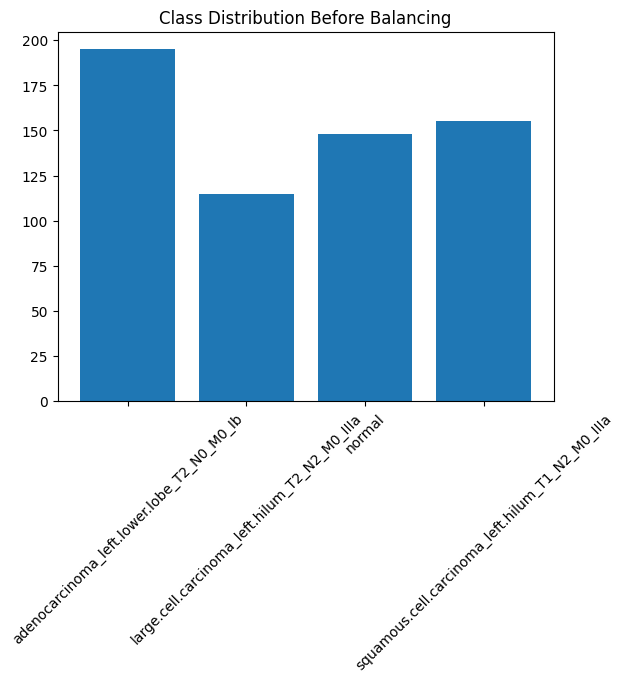

In [ ]:
import os
from collections import Counter

# Count samples per class in processed_train
class_counts = Counter()
for class_dir in os.listdir(processed_train):
    class_path = os.path.join(processed_train, class_dir)
    if os.path.isdir(class_path):
        class_counts[class_dir] = len(os.listdir(class_path))

print("Class distribution:", class_counts)
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution Before Balancing")
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.26.4
!pip install -U pip setuptools wheel
!pip install imgaug tensorflow jax other-packages-you-need


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
  Using cached imgaug-0.4.0-py2.py3-none-any.whl.metadata (1.8 kB)
ERROR: Could not find a version that satisfies the requirement other-packages-you-need (from versions: none)
ERROR: No matching distribution found for other-packages-you-need


In [ ]:
!pip install imgaug


  Using cached imgaug-0.4.0-py2.py3-none-any.whl.metadata (1.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 38.4 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa

# Définir les chemins
processed_train = "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train"
processed_valid = "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_valid"

# Correspondance entre classes et noms de dossiers
class_folders = {
    "adenocarcinoma": "adenocarcinoma",
    "squamous": "squamous",
    "normal": "normal",
    "large_cell": "large_cell"
}

# Initialisation des transformations (augmentations)
augmenter = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Affine(rotate=(-10, 10)),
    iaa.LinearContrast((0.9, 1.1))
], random_order=True)

# Étape 1 : Création du split validation
print("✅ Création du split validation à partir des images originales...")
os.makedirs(processed_valid, exist_ok=True)

for class_name in class_folders.values():
    class_path = os.path.join(processed_train, class_name)

    if not os.path.exists(class_path):
        print(f"⚠️ Dossier introuvable : {class_path} — ignoré.")
        continue

    files = [f for f in os.listdir(class_path) if not f.startswith('aug_')]

    if len(files) == 0:
        print(f"⚠️ Aucun fichier trouvé dans {class_path}")
        continue

    random.shuffle(files)
    val_files = files[:int(0.2 * len(files))]
    val_dir = os.path.join(processed_valid, class_name)
    os.makedirs(val_dir, exist_ok=True)

    for file in val_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(val_dir, file)
        if os.path.exists(src):
            os.rename(src, dst)

# Étape 2 : Augmentation pour équilibrer les classes
print("\n✅ Équilibrage des classes avec augmentation...")
target_count = 195  # Adapter selon la classe majoritaire initiale

for class_name in class_folders.values():
    class_path = os.path.join(processed_train, class_name)

    if not os.path.exists(class_path):
        print(f"⚠️ Dossier introuvable : {class_path} — ignoré.")
        continue

    current_files = [f for f in os.listdir(class_path) if not f.startswith('aug_')]
    current_count = len(current_files)

    if current_count < target_count:
        needed = target_count - current_count
        print(f"🔄 Augmentation de {class_name} : ajout de {needed} images")

        for i in tqdm(range(needed), desc=class_name):
            src_file = random.choice(current_files)
            src_path = os.path.join(class_path, src_file)
            img = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue

            aug_img = augmenter.augment_image(img)
            aug_filename = f"aug_{i}_{src_file}"
            aug_path = os.path.join(class_path, aug_filename)
            cv2.imwrite(aug_path, aug_img)

# Étape 3 : Comptage des fichiers par classe
def count_samples(path):
    return {
        cls: len(os.listdir(os.path.join(path, cls)))
        for cls in os.listdir(path)
        if os.path.isdir(os.path.join(path, cls))
    }

print("\n📊 Comptage final des images :")
print("📁 Entraînement :", count_samples(processed_train))
print("📁 Validation  :", count_samples(processed_valid))

# Étape 4 : Affichage de quelques images augmentées
sample_class = random.choice(list(class_folders.values()))
sample_path = os.path.join(processed_train, sample_class)

if os.path.exists(sample_path):
    samples = [f for f in os.listdir(sample_path) if 'aug_' in f][:4]

    plt.figure(figsize=(10, 5))
    for i, file in enumerate(samples):
        img = cv2.imread(os.path.join(sample_path, file), cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        plt.subplot(2, 2, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Augmentée : {file[:20]}...")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print(f"⚠️ Impossible d'afficher les images : dossier introuvable pour {sample_class}")


✅ Création du split validation à partir des images originales...
⚠️ Dossier introuvable : /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train/adenocarcinoma — ignoré.
⚠️ Dossier introuvable : /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train/squamous — ignoré.
⚠️ Dossier introuvable : /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train/large_cell — ignoré.

✅ Équilibrage des classes avec augmentation...
⚠️ Dossier introuvable : /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train/adenocarcinoma — ignoré.
⚠️ Dossier introuvable : /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train/squamous — ignoré.
🔄 Augmentation de normal : ajout de 76 images


normal: 100%|██████████| 76/76 [00:01<00:00, 52.35it/s]


⚠️ Dossier introuvable : /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train/large_cell — ignoré.

📊 Comptage final des images :
📁 Entraînement : {'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 195, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 115, 'normal': 195, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 155}
📁 Validation  : {'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 23, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 21, 'normal': 42, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 15}
⚠️ Impossible d'afficher les images : dossier introuvable pour squamous


In [ ]:
import os

print("Deleting augmented images...")

for class_name in class_folders.values():
    class_path = os.path.join(processed_train, class_name)

    if not os.path.exists(class_path):
        continue

    for file in os.listdir(class_path):
        if file.startswith('aug_'):
            try:
                os.remove(os.path.join(class_path, file))
            except Exception as e:
                print(f"Error deleting {file}: {e}")

print("Augmented images deleted.")


Deleting augmented images...
Augmented images deleted.


In [ ]:
!pip install tensorflow-addons


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

# Définir les transformations (selon ton modèle ou besoin)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Adapter selon le modèle (ex : 224x224 pour ResNet)
    transforms.ToTensor()
])

# Charger les données avec ImageFolder
processed_train = ImageFolder(root="/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train", transform=transform)
from collections import Counter

labels = [label for _, label in processed_train]
print(Counter(labels))

# Ou pour avoir les noms de classes
for class_name, count in zip(processed_train.classes, Counter(labels).values()):
    print(f"{class_name}: {count}")
from torch.utils.data import DataLoader

train_loader = DataLoader(processed_train, batch_size=32, shuffle=True)


Counter({0: 195, 2: 195, 3: 155, 1: 115})
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib: 195
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa: 115
normal: 195
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa: 155


In [ ]:
from torch.utils.data import WeightedRandomSampler

# Calculer le poids pour chaque classe
class_weights = [1.0 * len(processed_train) / c for c in Counter(labels).values()]

# Créer un sampler pondéré
weights = [class_weights[label] for label in labels]
sampler = WeightedRandomSampler(weights, len(weights))

# Charger les données avec le sampler
train_loader = DataLoader(processed_train, batch_size=32, sampler=sampler)
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(10),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

processed_train = ImageFolder(root="/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train", transform=transform)


In [ ]:
# Define paths to the training, validation, and test datasets
train_folder = '/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train'
test_folder = '/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test'
validate_folder = '/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_valid'

# Define paths to the specific classes within the dataset
normal_folder = '/normal'
adenocarcinoma_folder = '/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
large_cell_carcinoma_folder = '/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
squamous_cell_carcinoma_folder = '/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'


**CNN**

Libraries Imported
Reading training images from: /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train
Reading validation images from: /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_valid
Found 660 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Pretrained model used:


Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19      │ (None, 350, 350,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast_8 (Cast)       │ (None, 350, 350,  │          0 │ input_layer_19[0… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 174, 174,  │        864 │ cast_8[0][0]      │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 174, 174,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 174, 174,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 172, 172,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 172, 172,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 172, 172,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 172, 172,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 172, 172,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 172, 172,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 172, 172,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 172, 172,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 86, 86,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 86, 86,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 86, 86,    │        512 │ conv2d_38[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_24 (Add)        │ (None, 86, 86,    │          0 │ block2_pool[0][0

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

Final model created:


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 11, 11, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4)              │         8,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,869,676 (79.61 MB)

 Trainable params: 8,196 (32.02 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3161 - loss: 1.3579
Epoch 1: val_loss improved from inf to 1.32512, saving model to best_model.weights.h5
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 248ms/step - accuracy: 0.3210 - loss: 1.3537 - val_accuracy: 0.3063 - val_loss: 1.3251 - learning_rate: 0.0010
Epoch 2/50
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.5409 - loss: 1.0957
Epoch 2: val_loss improved from 1.32512 to 1.14490, saving model to best_model.weights.h5
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 349ms/step - accuracy: 0.5452 - loss: 1.0902 - val_accuracy: 0.5375 - val_loss: 1.1449 - learning_rate: 0.0010
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6725 - loss: 0.9180
Epoch 3: val_loss improved from 1.14490 to 1.10124, saving model to best_model.weights.h5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - accuracy: 0.6723 - loss: 0.9164 - val_accuracy: 0.5312 - val_loss: 1.1012 - learning_rate: 0.0010
Epoch 4/50
 7/25 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - a

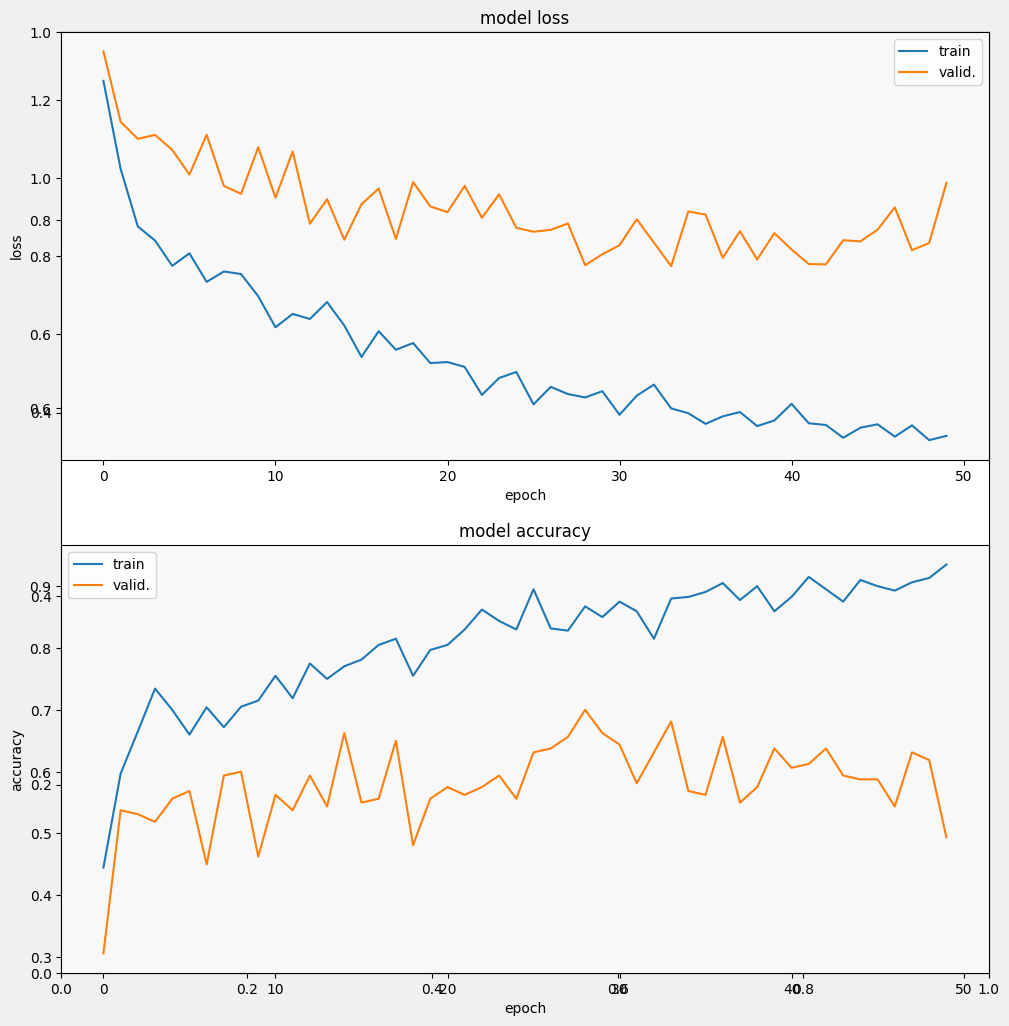

In [ ]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout2D, Activation, Lambda, Flatten, LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import utils

print("Libraries Imported")

# Set the image size for resizing
IMAGE_SIZE = (350, 350)

# Initialize the image data generators for training and testing
print("Reading training images from:", train_folder)
print("Reading validation images from:", validate_folder)

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


# Define the batch size for training
batch_size = 8


# Create the training data generator
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical'
)


# Create the validation data generator
validation_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical'
)
# Set up callbacks for learning rate reduction, early stopping, and model checkpointing
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience=5, verbose=2, factor=0.5, min_lr=0.000001)
early_stops = EarlyStopping(monitor='loss', min_delta=0, patience=6, verbose=2, mode='auto')
checkpointer = ModelCheckpoint(filepath='best_model.weights.h5',
                               verbose=2,
                               save_best_only=True,
                               save_weights_only=True)

# Define the number of output classes
OUTPUT_SIZE = 4

# Load a pre-trained model (Xception) without the top layers and freeze its weights
pretrained_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
pretrained_model.trainable = False

# Create a new model with the pre-trained base and additional layers for classification
model = Sequential()
model.add(pretrained_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(OUTPUT_SIZE, activation='softmax'))

print("Pretrained model used:")
pretrained_model.summary()

print("Final model created:")
model.summary()

# Compile the model with an optimizer, loss function, and evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model with the training and validation data generators
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=50,
    callbacks=[learning_rate_reduction, early_stops, checkpointer],
    validation_data=validation_generator,
    validation_steps=20
)

print("Final training accuracy =", history.history['accuracy'][-1])
print("Final testing accuracy =", history.history['val_accuracy'][-1])

# Function to display training curves for loss and accuracy
def display_training_curves(training, validation, title, subplot):
    if subplot % 10 == 1:
        plt.subplots(figsize=(10, 10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model ' + title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

# Display training curves for loss and accuracy
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 211)
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 212)


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5144 - loss: 1.1906
Epoch 1: val_loss improved from inf to 0.91976, saving model to xception_best.weights.h5
25/25 ━━━━━━━━━━━━━━━━━━━━ 246s 9s/step - accuracy: 0.5142 - loss: 1.1873 - val_accuracy: 0.5556 - val_loss: 0.9198 - learning_rate: 0.0010
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6588 - loss: 0.8570
Epoch 2: val_loss did not improve from 0.91976
25/25 ━━━━━━━━━━━━━━━━━━━━ 228s 9s/step - accuracy: 0.6585 - loss: 0.8592 - val_accuracy: 0.5000 - val_loss: 1.8340 - learning_rate: 0.0010
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6774 - loss: 0.8180
Epoch 3: val_loss did not improve from 0.91976
25/25 ━━━━━━━━━━━━━━━━━━━━ 224s 9s/step - accuracy: 0.6767 - loss: 0.8185 - val_accuracy: 0.4306 - val_loss: 2.1582 - learning_rate: 0.0010
Epoch 4/30
 2/25 ━━━━━━━━━━━━━━━━━━━━ 1:45 5s/step - accuracy: 0.86

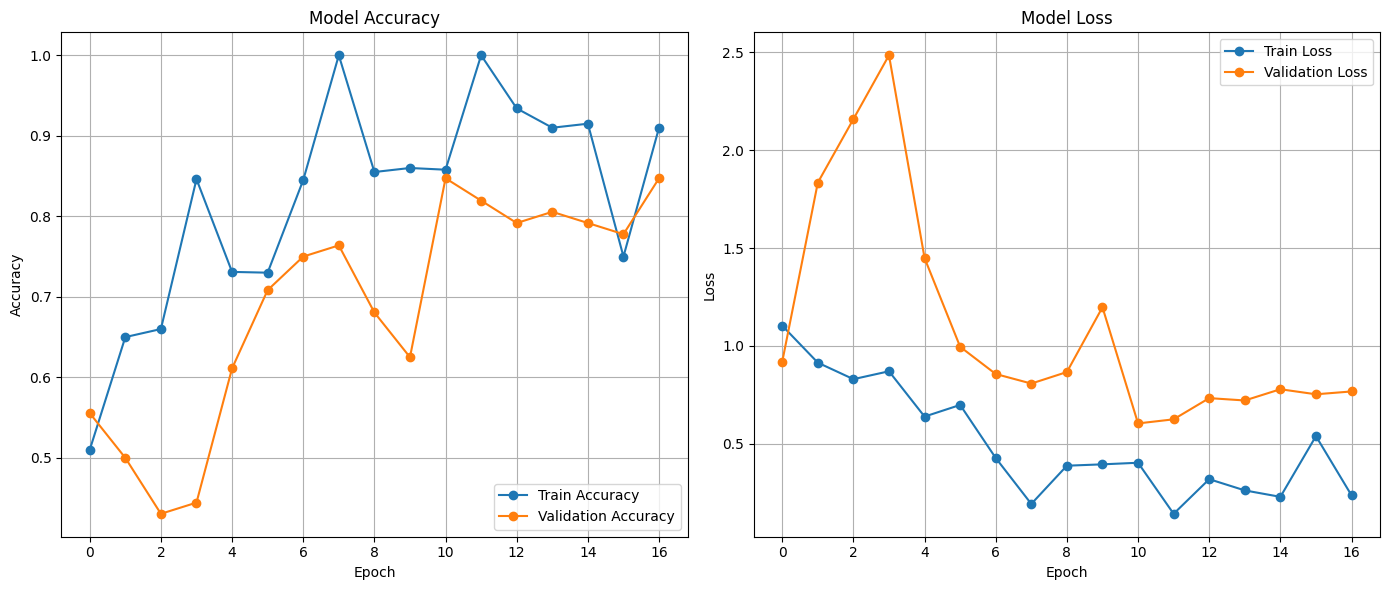

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Image: /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/normal/10 (2) - Copy.png — Predicted class: 2


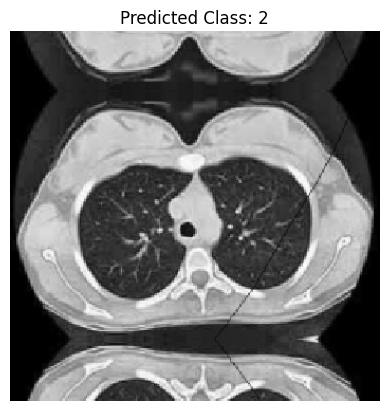

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step
Image: /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/squamous.cell.carcinoma/000110 (2).png — Predicted class: 0


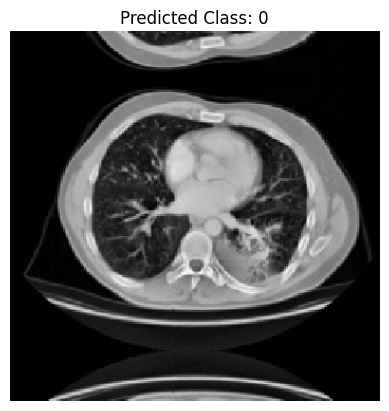

In [ ]:
# Imports
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import Xception
import tensorflow as tf

# Paramètres
IMAGE_SIZE = (350, 350)
batch_size = 8
OUTPUT_SIZE = 4

# Dossiers d'entraînement / validation2555823
train_folder = '/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train'
test_folder = '/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_valid'

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Générateurs
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='categorical'
)

# Modèle pré-entraîné
pretrained_model = Xception(weights='imagenet', include_top=False, input_shape=(*IMAGE_SIZE, 3))
pretrained_model.trainable = True

# Fine-tuning : ne pas entraîner les premières couches
fine_tune_at = 100
for layer in pretrained_model.layers[:fine_tune_at]:
    layer.trainable = False

# Construction du modèle
model = Sequential([
    pretrained_model,
    GlobalAveragePooling2D(),
    Dense(OUTPUT_SIZE, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=2, factor=0.5, min_lr=1e-6),
    EarlyStopping(monitor='val_loss', patience=6, verbose=2),
    ModelCheckpoint(filepath='xception_best.weights.h5', save_best_only=True, save_weights_only=True, verbose=2)
]

# Entraînement
history = model.fit(
    train_generator,
    epochs=30,
    steps_per_epoch=25,
    validation_data=validation_generator,
    validation_steps=20,
    callbacks=callbacks
)

# Affichage des courbes
def plot_training_curves(history):
    plt.figure(figsize=(14, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_curves(history)

# Fonction de prédiction
def predict_image(img_path, model, target_size=(350, 350)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction[0])
    print(f"Image: {img_path} — Predicted class: {predicted_class}")
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()

# Exemple d’utilisation (à personnaliser)
test_images = ['/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/normal/10 (2) - Copy.png', '/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/squamous.cell.carcinoma/000110 (2).png']
for img_path in test_images:
    predict_image(img_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Image: /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/normal/10 (2) - Copy.png
Predicted class: normal


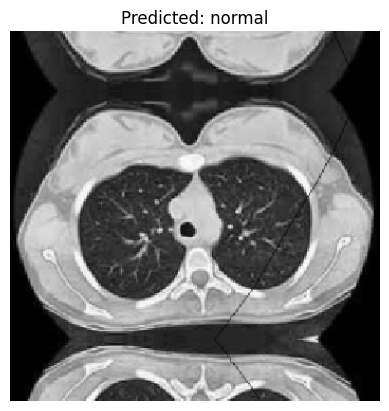

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image: /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/squamous.cell.carcinoma/000110 (2).png
Predicted class: adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib


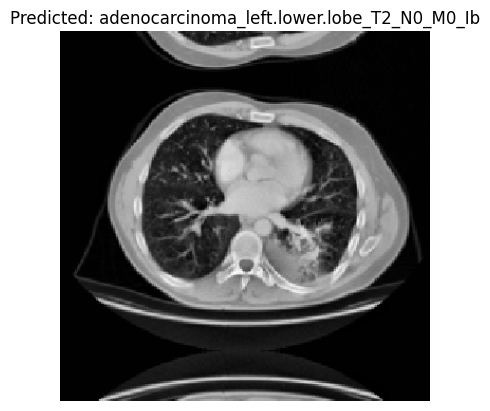

In [ ]:
# Liste des classes dans le bon ordre (doit correspondre à l'ordre du générateur)
classes = [
    "adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib",
    "large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa",
    "normal",
    "squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa"
]

def predict_image(img_path, model, target_size=(350, 350)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction[0])
    predicted_class_name = classes[predicted_class]

    print(f"Image: {img_path}")
    print(f"Predicted class: {predicted_class_name}")

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_name}")
    plt.axis('off')
    plt.show()

# Exemple d’utilisation
test_images = [
    '/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/normal/10 (2) - Copy.png',
    '/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/squamous.cell.carcinoma/000110 (2).png'
]

for img_path in test_images:
    predict_image(img_path, model)


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3276 - loss: 1.3980
Epoch 1: val_loss improved from inf to 1.19706, saving model to xception_best.weights.h5
25/25 ━━━━━━━━━━━━━━━━━━━━ 163s 6s/step - accuracy: 0.3281 - loss: 1.3961 - val_accuracy: 0.4722 - val_loss: 1.1971 - learning_rate: 0.0010
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4937 - loss: 1.0971
Epoch 2: val_loss improved from 1.19706 to 1.08247, saving model to xception_best.weights.h5
25/25 ━━━━━━━━━━━━━━━━━━━━ 153s 6s/step - accuracy: 0.4938 - loss: 1.0974 - val_accuracy: 0.4722 - val_loss: 1.0825 - learning_rate: 0.0010
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5700 - loss: 0.9923
Epoch 3: val_loss improved from 1.08247 to 1.05215, saving model to xception_best.weights.h5
25/25 ━━━━━━━━━━━━━━━━━━━━ 156s 6s/step - accuracy: 0.5698 - loss: 0.9921 - val_accuracy: 0.4583 - val_loss: 1.0521

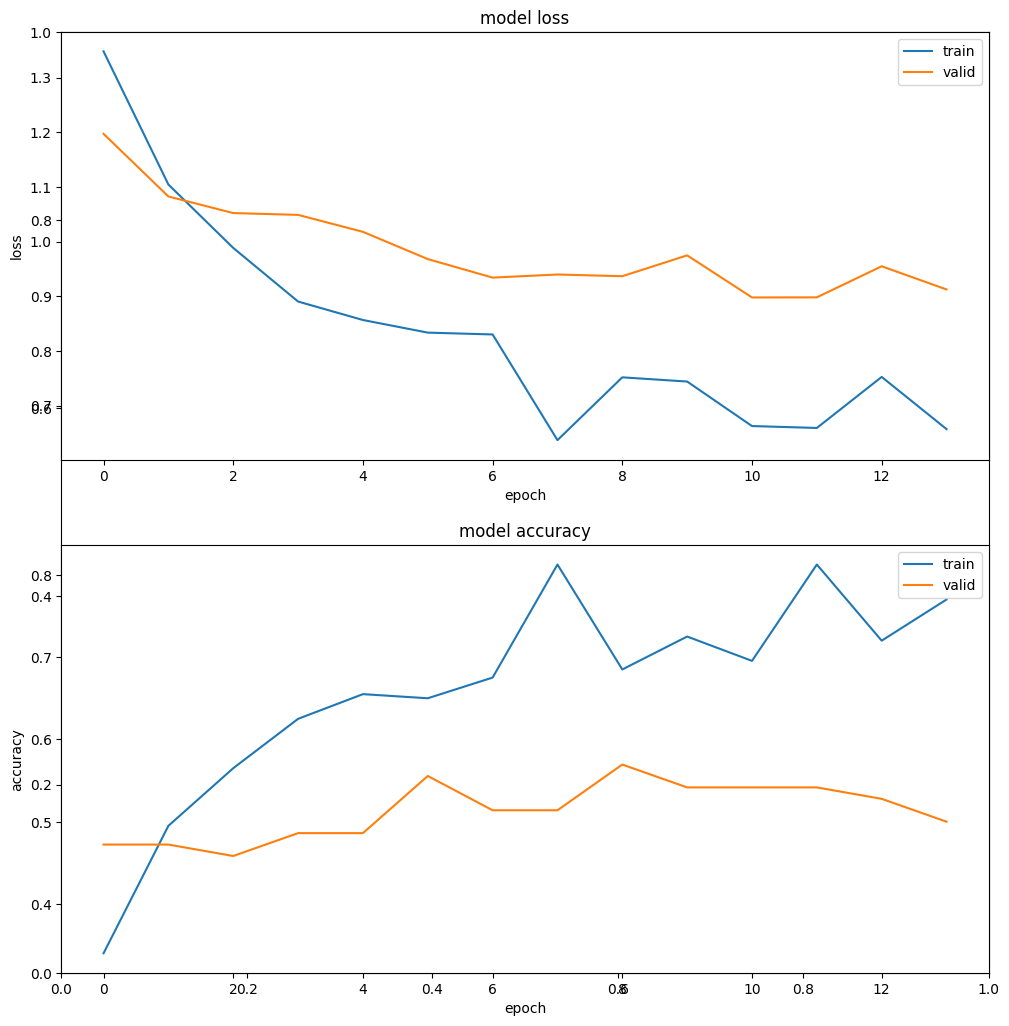

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

IMAGE_SIZE = (350, 350)
batch_size = 8
OUTPUT_SIZE = 4

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='categorical'
)

pretrained_model = Xception(weights='imagenet', include_top=False, input_shape=(*IMAGE_SIZE, 3))
pretrained_model.trainable = False

model = Sequential([
    pretrained_model,
    GlobalAveragePooling2D(),
    Dense(OUTPUT_SIZE, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    ReduceLROnPlateau(monitor='loss', patience=5, verbose=2, factor=0.5, min_lr=1e-6),
    EarlyStopping(monitor='loss', patience=6, verbose=2),
    ModelCheckpoint(filepath='xception_best.weights.h5', save_best_only=True, save_weights_only=True, verbose=2)
]

history = model.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=25,
    validation_data=validation_generator,
    validation_steps=20,
    callbacks=callbacks
)

def display_training_curves(training, validation, title, subplot):
    if subplot % 10 == 1:
        plt.subplots(figsize=(10, 10))
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model ' + title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid'])

display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 211)
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 212)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
Image: /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/normal/10 (2) - Copy.png
Predicted class: normal


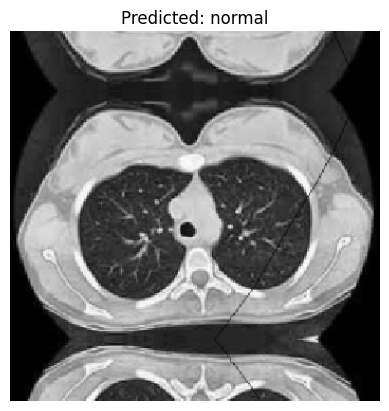

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
Image: /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/squamous.cell.carcinoma/000177 (3).png
Predicted class: adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib


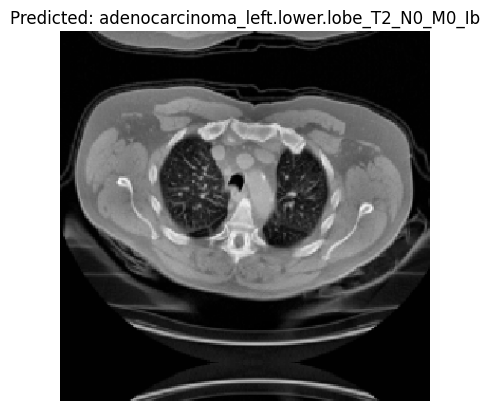

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Récupérer les noms de classes dans le bon ordre
class_indices = train_generator.class_indices
classes = list(class_indices.keys())

def predict_image(img_path, model, target_size=(350, 350)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction[0])
    predicted_class_name = classes[predicted_class]

    print(f"Image: {img_path}")
    print(f"Predicted class: {predicted_class_name}")

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_name}")
    plt.axis('off')
    plt.show()

# Exemple d’utilisation : tester sur deux images
test_images = [
    '/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/normal/10 (2) - Copy.png',
    '/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/squamous.cell.carcinoma/000177 (3).png'
]

for img_path in test_images:
    predict_image(img_path, model)


**ResNet50**

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3576 - loss: 1.5252
Epoch 1: val_loss improved from inf to 1.38879, saving model to resnet50_best.weights.h5
25/25 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 0.3569 - loss: 1.5222 - val_accuracy: 0.2083 - val_loss: 1.3888 - learning_rate: 0.0010
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4021 - loss: 1.2488
Epoch 2: val_loss improved from 1.38879 to 1.23966, saving model to resnet50_best.weights.h5
25/25 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.4015 - loss: 1.2497 - val_accuracy: 0.3889 - val_loss: 1.2397 - learning_rate: 0.0010
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3975 - loss: 1.2645
Epoch 3: val_loss improved from 1.23966 to 1.21606, saving model to resnet50_best.weights.h5
25/25 ━━━━━━━━━━━━━━━━━━━━ 120s 5s/step - accuracy: 0.3986 - los

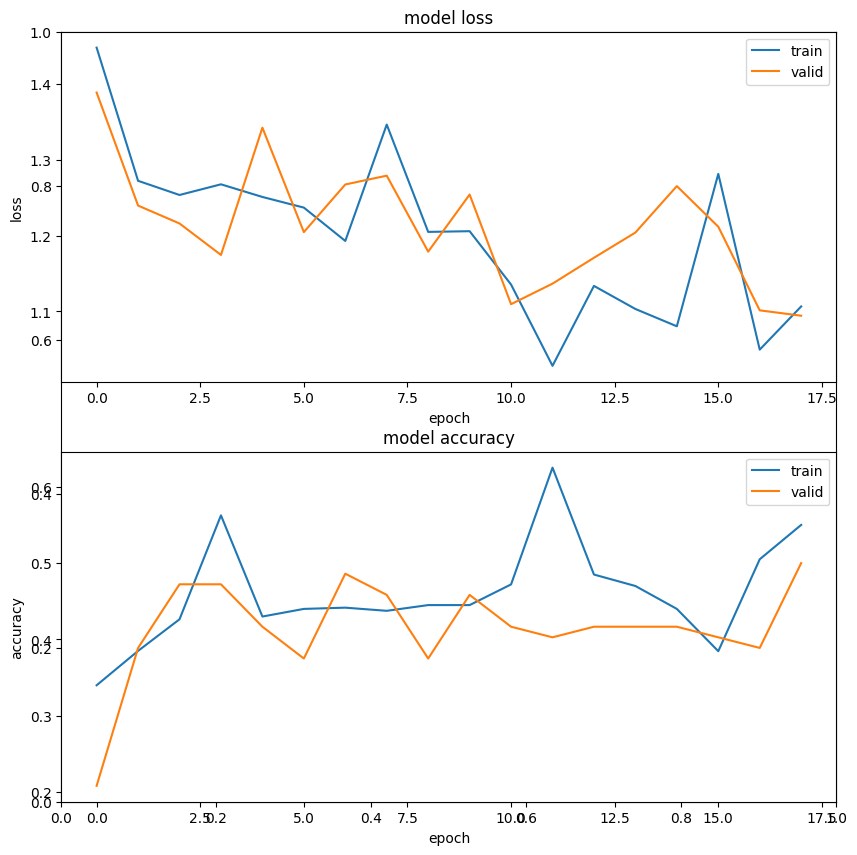

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

# Paramètres
IMAGE_SIZE = (350, 350)
batch_size = 8
OUTPUT_SIZE = 4

# Préparation des données
train_generator = ImageDataGenerator(rescale=1./255, horizontal_flip=True).flow_from_directory(
    train_folder, target_size=IMAGE_SIZE, batch_size=batch_size, class_mode='categorical')

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_folder, target_size=IMAGE_SIZE, batch_size=batch_size, class_mode='categorical')

# Modèle pré-entraîné ResNet50
pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=(*IMAGE_SIZE, 3))
pretrained_model.trainable = False

model = Sequential([
    pretrained_model,
    GlobalAveragePooling2D(),
    Dense(OUTPUT_SIZE, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='loss', patience=5, verbose=2, factor=0.5, min_lr=1e-6),
    EarlyStopping(monitor='loss', patience=6, verbose=2),
    ModelCheckpoint(filepath='resnet50_best.weights.h5', save_best_only=True, save_weights_only=True, verbose=2)
]

# Entraînement
history = model.fit(
    train_generator, epochs=50, steps_per_epoch=25,
    validation_data=validation_generator, validation_steps=20,
    callbacks=callbacks
)

# Visualisation des courbes d'entraînement
def display_training_curves(training, validation, title, subplot):
    if subplot % 10 == 1: plt.subplots(figsize=(10, 10))
    ax = plt.subplot(subplot)
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model ' + title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid'])

display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 211)
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 212)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Image: /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/normal/10 (2) - Copy.png
Predicted class: normal


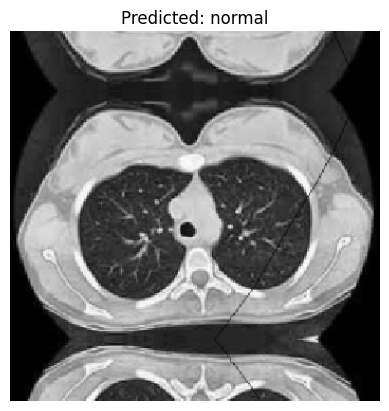

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
Image: /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/squamous.cell.carcinoma/000110 (2).png
Predicted class: adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib


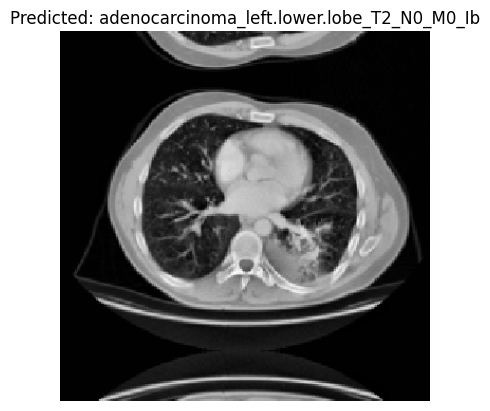

In [ ]:
class_indices = train_generator.class_indices
classes = list(class_indices.keys())

def predict_image(img_path, model, target_size=(350, 350)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction[0])
    predicted_class_name = classes[predicted_class]

    print(f"Image: {img_path}")
    print(f"Predicted class: {predicted_class_name}")

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_name}")
    plt.axis('off')
    plt.show()

# Exemple d’images à tester
test_images = [
    '/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/normal/10 (2) - Copy.png',
    '/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/squamous.cell.carcinoma/000110 (2).png'
]

for img_path in test_images:
    predict_image(img_path, model)

**VGG16**

Found 660 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2495 - loss: 1.5212
Epoch 1: val_loss improved from inf to 1.35378, saving model to vgg16_best.weights.h5
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - accuracy: 0.2511 - loss: 1.5175 - val_accuracy: 0.4062 - val_loss: 1.3538 - learning_rate: 0.0010
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3389 - loss: 1.3440
Epoch 2: val_loss did not improve from 1.35378
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.3409 - loss: 1.3437 - val_accuracy: 0.3000 - val_loss: 1.3657 - learning_rate: 0.0010
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.4620 - loss: 1.3131
Epoch 3: val_loss improved from 1.35378 to 1.30936, saving model to vgg16_best.weights.h5
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 419ms/step - accuracy: 0.4607 - loss: 1.3125 - val_accuracy: 0.1937 - val_

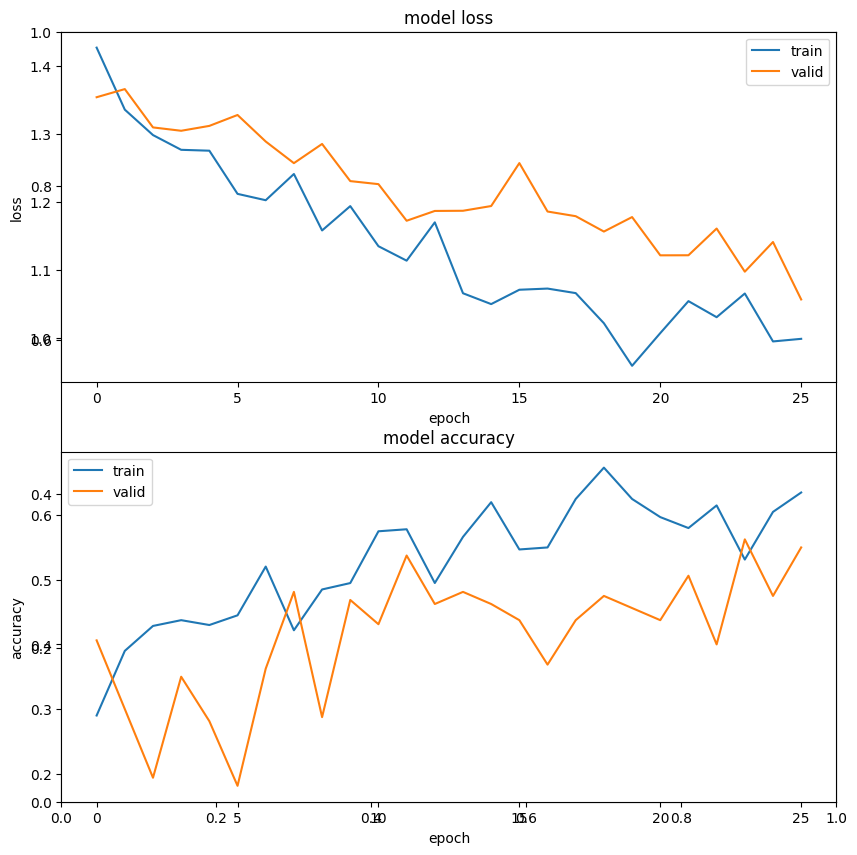

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

IMAGE_SIZE = (350, 350)
batch_size = 8
OUTPUT_SIZE = 4

train_generator = ImageDataGenerator(rescale=1./255, horizontal_flip=True).flow_from_directory(
    train_folder, target_size=IMAGE_SIZE, batch_size=batch_size, class_mode='categorical')

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_folder, target_size=IMAGE_SIZE, batch_size=batch_size, class_mode='categorical')

pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(*IMAGE_SIZE, 3))
pretrained_model.trainable = False

model = Sequential([
    pretrained_model,
    GlobalAveragePooling2D(),
    Dense(OUTPUT_SIZE, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    ReduceLROnPlateau(monitor='loss', patience=5, verbose=2, factor=0.5, min_lr=1e-6),
    EarlyStopping(monitor='loss', patience=6, verbose=2),
    ModelCheckpoint(filepath='vgg16_best.weights.h5', save_best_only=True, save_weights_only=True, verbose=2)
]

history = model.fit(
    train_generator, epochs=50, steps_per_epoch=25,
    validation_data=validation_generator, validation_steps=20,
    callbacks=callbacks
)

def display_training_curves(training, validation, title, subplot):
    if subplot % 10 == 1: plt.subplots(figsize=(10, 10))
    ax = plt.subplot(subplot)
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model ' + title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid'])

display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 211)
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 212)


**CREATION DES LABELS DE YOLOV8**

In [ ]:
from ultralytics import YOLO
import os

# Charger le modèle
model = YOLO("yolov8n.pt")

# Base de ton dataset
base_path = "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset"

# Liste des classes
classes = [
    "adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib",
    "large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa",
    "normal",
    "squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa"
]

# Fonction de prédiction
def predict_and_save(mode):  # mode = processed_train ou processed_valid
    for class_name in classes:
        source_path = os.path.join(base_path, mode, class_name)
        print(f"🔎 Prédiction sur : {source_path}")
        model.predict(source=source_path, save=True, save_txt=True, project=f"runs/detect_{mode}", name=class_name)

# 🔁 Prédictions sur les datasets
predict_and_save("processed_train")
predict_and_save("processed_valid")


🔎 Prédiction sur : /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib

image 1/195 /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000000 (6).png: 640x640 (no detections), 9.5ms
image 2/195 /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000005 (3).png: 640x640 2 bowls, 1 dining table, 7.9ms
image 3/195 /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000005 (9).png: 640x640 1 dining table, 9.8ms
image 4/195 /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000008 (10).png: 640x640 1 dining 

In [ ]:
# Création de la structure YOLO standard
!mkdir -p "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/labels/train"
!mkdir -p "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/labels/val"

# Copie des images (au lieu de déplacement pour conserver les originaux)
!cp -r "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_train/"* "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/images/"
!cp -r "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_valid/"* "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/images/"

# Copie des labels
!cp -r "/content/runs/detect_processed_train/"* "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/labels/train/"
!cp -r "/content/runs/detect_processed_valid/"* "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/labels/val/"

In [ ]:
from pathlib import Path
import os

# Chemins absolus
base_path = "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset"
paths_to_check = [
    f"{base_path}/images",
    f"{base_path}/labels/train",
    f"{base_path}/labels/val"
]

# Vérification
for path in paths_to_check:
    if not os.path.exists(path):
        print(f"[ERREUR] Path manquant: {path}")
    else:
        num_files = len(os.listdir(path))
        print(f"[OK] {path} contient {num_files} fichiers")

# Vérification de correspondance images/labels
train_images = set(Path(f"{base_path}/images").glob("*"))
train_labels = set(Path(f"{base_path}/labels/train").glob("*.txt"))

missing_labels = [img.stem for img in train_images if f"{img.stem}.txt" not in [lb.name for lb in train_labels]]
if missing_labels:
    print(f"\n[ATTENTION] {len(missing_labels)} images sans labels correspondants")

[OK] /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/images contient 4 fichiers
[OK] /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/labels/train contient 4 fichiers
[OK] /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/labels/val contient 4 fichiers

[ATTENTION] 4 images sans labels correspondants


In [ ]:
import os
from pathlib import Path

# Chemins absolus
BASE_DIR = "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/yolo_lung_data"

def verify_structure():
    """Vérifie et corrige la structure des dossiers"""
    required = {
        'images/train': ['.jpg', '.png', '.jpeg'],
        'images/val': ['.jpg', '.png', '.jpeg'],
        'labels/train': ['.txt'],
        'labels/val': ['.txt']
    }

    for rel_path, exts in required.items():
        path = Path(BASE_DIR)/rel_path
        if not path.exists():
            path.mkdir(parents=True, exist_ok=True)
            print(f"Créé: {path}")

        files = list(path.glob('*'))
        print(f"\n{path}:")
        print(f"• {len(files)} fichiers trouvés")

        # Vérification des extensions
        valid_files = [f for f in files if f.suffix.lower() in exts]
        if len(valid_files) != len(files):
            print(f"⚠ Attention: {len(files)-len(valid_files)} fichiers avec mauvaise extension")

verify_structure()


/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/yolo_lung_data/images/train:
• 4 fichiers trouvés
⚠ Attention: 4 fichiers avec mauvaise extension

/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/yolo_lung_data/images/val:
• 4 fichiers trouvés
⚠ Attention: 4 fichiers avec mauvaise extension

/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/yolo_lung_data/labels/train:
• 5 fichiers trouvés
⚠ Attention: 5 fichiers avec mauvaise extension

/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/yolo_lung_data/labels/val:
• 6 fichiers trouvés
⚠ Attention: 6 fichiers avec mauvaise extension


In [ ]:
from pathlib import Path

BASE_DIR = "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/yolo_lung_data"

def find_missing_labels():
    missing = {}
    for split in ['train', 'val']:
        images = set(f.stem for f in Path(f"{BASE_DIR}/images/{split}").glob('*'))
        labels = set(f.stem for f in Path(f"{BASE_DIR}/labels/{split}").glob('*.txt'))
        missing[split] = list(images - labels)

    return missing

missing_files = find_missing_labels()
print("Images sans labels:")
print(f"Train: {missing_files['train']}")
print(f"Val: {missing_files['val']}")

Images sans labels:
Train: ['normal', 'adenocarcinoma_left.lower', 'squamous.cell.carcinoma_left', 'large.cell.carcinoma_left']
Val: ['normal', 'adenocarcinoma_left.lower', 'squamous.cell.carcinoma_left', 'large.cell.carcinoma_left']


In [ ]:
for split in ['train', 'val']:
    for img_path in Path(f"{BASE_DIR}/images/{split}").glob('*'):
        label_path = Path(f"{BASE_DIR}/labels/{split}/{img_path.stem}.txt")
        if not label_path.exists():
            # Essayer avec d'autres extensions
            for ext in ['.jpg', '.png', '.jpeg']:
                alt_path = Path(f"{BASE_DIR}/labels/{split}/{img_path.stem}{ext}.txt")
                if alt_path.exists():
                    shutil.copy(alt_path, label_path)
                    print(f"Corrigé extension pour: {img_path.name}")
                    break

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
!pip install pyyaml

TRAIN DE YOLOV8

In [ ]:
from ultralytics import YOLO

# Chemins
model_path = "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/yolo_lung_data/yolov8n.pt"
data_yaml = "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/yolo_lung_data/lung_cancer.yaml"

# Charger le modèle pré-entraîné
model = YOLO(model_path)

# Entraîner le modèle
model.train(
    data=data_yaml,
    epochs=30,
    imgsz=640,
    batch=16,              # Ajouter un batch size (ajustable selon la RAM dispo)
    patience=10,           # Early stopping si pas d’amélioration
    project='lung_yolo',   # Dossier du projet
    name='yolov8n_lung',   # Nom de l'entraînement
    exist_ok=True          # Ne plante pas si le dossier existe déjà
)


Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/yolo_lung_data/yolov8n.pt, data=/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/yolo_lung_data/lung_cancer.yaml, epochs=30, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=lung_yolo, name=yolov8n_lung, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=

100%|██████████| 755k/755k [00:00<00:00, 33.6MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 169MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.1±0.0 MB/s, size: 35.6 KB)


train: Scanning /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/yolo_lung_data/labels/train.cache... 566 images, 0 backgrounds, 0 corrupt: 100%|██████████| 566/566 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.8±0.5 ms, read: 0.0±0.0 MB/s, size: 33.0 KB)


val: Scanning /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/yolo_lung_data/labels/val.cache... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<?, ?it/s]


Plotting labels to lung_yolo/yolov8n_lung/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to lung_yolo/yolov8n_lung
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.01G     0.5001       2.68      1.209         18        640: 100%|██████████| 36/36 [00:14<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.30s/it]

                   all         63         63      0.661      0.139      0.375      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.48G     0.2397      1.751     0.9925         20        640: 100%|██████████| 36/36 [00:12<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         63         63      0.308      0.848      0.551      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.48G     0.2318      1.539     0.9769         15        640: 100%|██████████| 36/36 [00:11<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         63         63      0.434      0.996      0.572      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.48G     0.2191      1.443     0.9748         15        640: 100%|██████████| 36/36 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         63         63      0.384      0.903      0.458      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.48G      0.213      1.355     0.9533         18        640: 100%|██████████| 36/36 [00:09<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         63         63      0.843      0.231      0.466      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.48G     0.1855      1.274     0.9437         20        640: 100%|██████████| 36/36 [00:09<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         63         63      0.443      0.961        0.6      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.49G     0.1751      1.189     0.9301         20        640: 100%|██████████| 36/36 [00:11<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         63         63      0.479      0.987      0.578      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.49G     0.1593      1.147     0.9323         21        640: 100%|██████████| 36/36 [00:11<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         63         63      0.444      0.976      0.557      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.49G     0.1587      1.136     0.9318         20        640: 100%|██████████| 36/36 [00:11<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         63         63      0.482      0.906      0.597      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.49G     0.1507       1.08     0.9298         18        640: 100%|██████████| 36/36 [00:10<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         63         63      0.318      0.795      0.566      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       2.5G     0.1461      1.069     0.9338         15        640: 100%|██████████| 36/36 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         63         63      0.328      0.924      0.536      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       2.5G     0.1421      1.036     0.9328         14        640: 100%|██████████| 36/36 [00:09<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         63         63      0.495      0.772      0.607      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       2.5G     0.1289     0.9929      0.909         19        640: 100%|██████████| 36/36 [00:10<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         63         63      0.573      0.896      0.686      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30       2.5G     0.1178     0.9541     0.9109         16        640: 100%|██████████| 36/36 [00:11<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         63         63      0.589      0.815      0.673      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       2.5G     0.1114     0.9529     0.9101         18        640: 100%|██████████| 36/36 [00:12<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         63         63      0.591      0.759      0.651      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       2.5G       0.11      0.913     0.9163         19        640: 100%|██████████| 36/36 [00:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         63         63      0.608      0.848      0.687      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.52G     0.1066     0.8671      0.906         17        640: 100%|██████████| 36/36 [00:10<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         63         63      0.609       0.89       0.72      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.54G    0.09674     0.8468     0.8984         21        640: 100%|██████████| 36/36 [00:09<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         63         63      0.506      0.922      0.702      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.55G     0.1028     0.8281     0.9029         18        640: 100%|██████████| 36/36 [00:09<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         63         63      0.673      0.853      0.763      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.57G    0.09913     0.7979     0.9076         13        640: 100%|██████████| 36/36 [00:11<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         63         63      0.654      0.864       0.76      0.757


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.58G    0.09015      1.017     0.9378          6        640: 100%|██████████| 36/36 [00:12<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         63         63      0.559      0.905      0.693      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.58G    0.07566     0.8708     0.9456          6        640: 100%|██████████| 36/36 [00:10<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         63         63       0.63      0.934      0.808      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.58G    0.06689     0.7823     0.9105          6        640: 100%|██████████| 36/36 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         63         63      0.765      0.885      0.827      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.58G    0.06277     0.6778     0.9121          6        640: 100%|██████████| 36/36 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         63         63      0.771      0.844      0.837      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.59G     0.0533     0.6379     0.9072          6        640: 100%|██████████| 36/36 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         63         63      0.766      0.868      0.823      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.59G    0.05176     0.6536     0.9209          6        640: 100%|██████████| 36/36 [00:10<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         63         63      0.797      0.799       0.88       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.59G    0.04569     0.5656     0.9212          6        640: 100%|██████████| 36/36 [00:10<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         63         63       0.76       0.87      0.852      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.59G    0.04876     0.5744      0.906          6        640: 100%|██████████| 36/36 [00:10<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         63         63      0.664      0.889       0.87       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.59G    0.04367     0.5214     0.9073          6        640: 100%|██████████| 36/36 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         63         63      0.768       0.93      0.914      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.59G    0.03987     0.5045     0.9127          6        640: 100%|██████████| 36/36 [00:09<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         63         63       0.85      0.847      0.935      0.935



30 epochs completed in 0.105 hours.
Optimizer stripped from lung_yolo/yolov8n_lung/weights/last.pt, 6.2MB
Optimizer stripped from lung_yolo/yolov8n_lung/weights/best.pt, 6.2MB

Validating lung_yolo/yolov8n_lung/weights/best.pt...
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


                   all         63         63       0.85      0.848      0.934      0.934
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib         16         16      0.569      0.875      0.873      0.873
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa         19         19          1      0.565      0.914      0.914
                normal         13         13          1       0.97      0.995      0.995
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa         15         15       0.83       0.98      0.954      0.954
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to lung_yolo/yolov8n_lung


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ff3818674d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

✅ Modèle sauvegardé ici : /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/yolo_lung_data/yolo_classification.pt


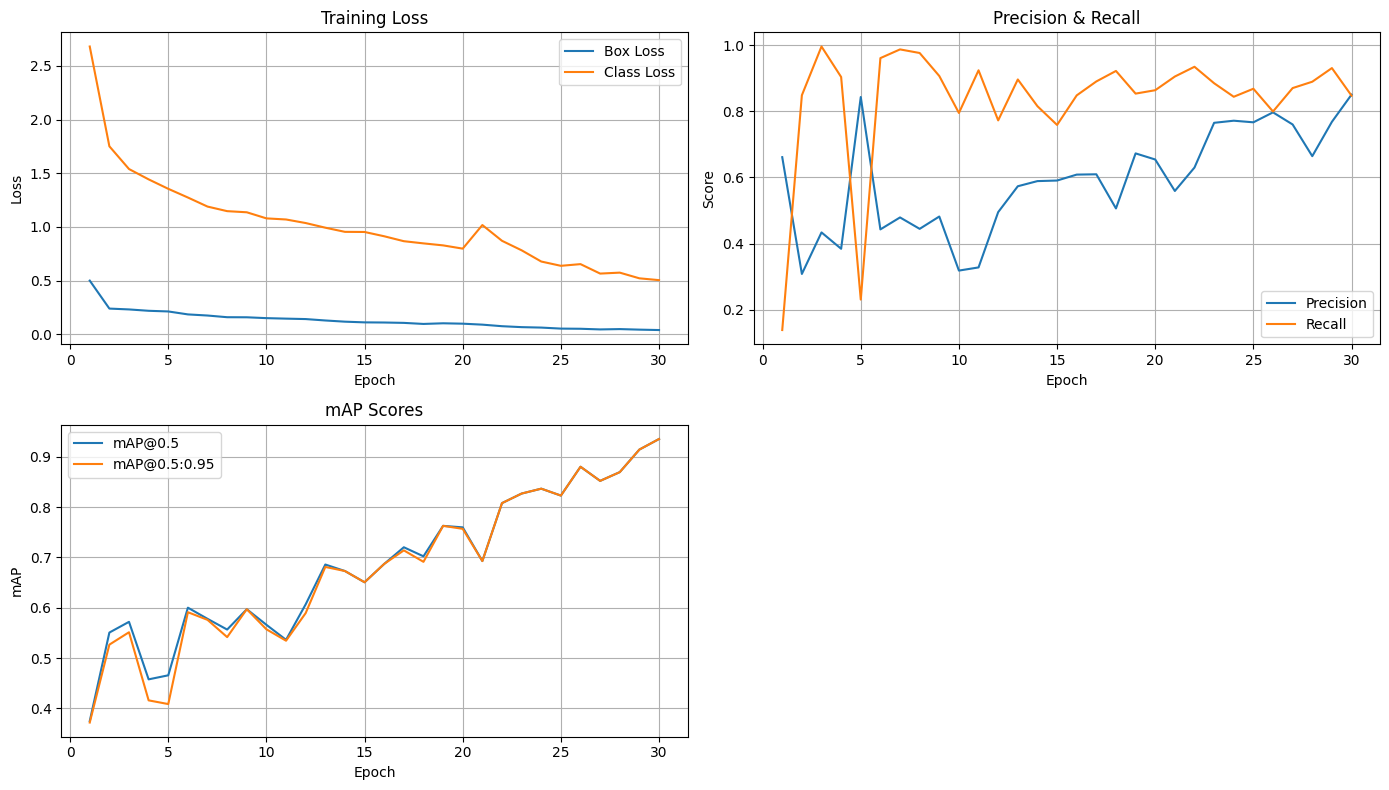

In [ ]:
import os
save_path = "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/yolo_lung_data/yolo_classification.pt"
model.save(save_path)
print(f"✅ Modèle sauvegardé ici : {save_path}")

# 🔹 Visualisation des courbes depuis results.csv
results_dir = model.trainer.save_dir
csv_path = os.path.join(results_dir, "results.csv")

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)

    plt.figure(figsize=(14, 8))

    # 🔸 Loss
    plt.subplot(2, 2, 1)
    plt.plot(df['epoch'], df['train/box_loss'], label='Box Loss')
    plt.plot(df['epoch'], df['train/cls_loss'], label='Class Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # 🔸 Précision & Rappel
    plt.subplot(2, 2, 2)
    plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
    plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
    plt.title('Precision & Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()

    # 🔸 mAP
    plt.subplot(2, 2, 3)
    plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
    plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
    plt.title('mAP Scores')
    plt.xlabel('Epoch')
    plt.ylabel('mAP')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()
else:
    print("❌ Fichier results.csv introuvable — impossible d'afficher les courbes.")

**TEST YOLOV8**


🖼️ Image 1: /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/squamous.cell.carcinoma/000115 (4).png

image 1/1 /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/squamous.cell.carcinoma/000115 (4).png: 640x640 1 squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa, 8.6ms
Speed: 3.6ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


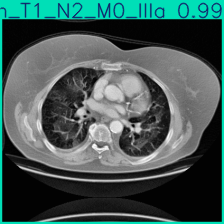

👉 Objet 1: squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa (Confiance: 0.99)


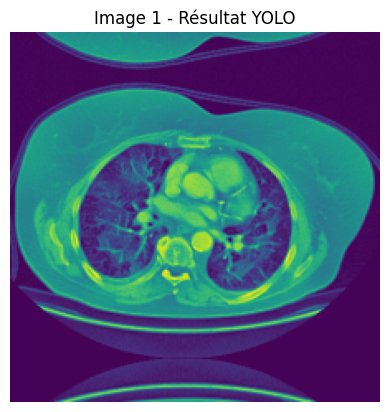


🖼️ Image 2: /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/normal/12 - Copy - Copy.png

image 1/1 /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/normal/12 - Copy - Copy.png: 640x640 1 normal, 7.5ms
Speed: 2.6ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


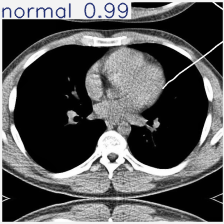

👉 Objet 1: normal (Confiance: 0.99)


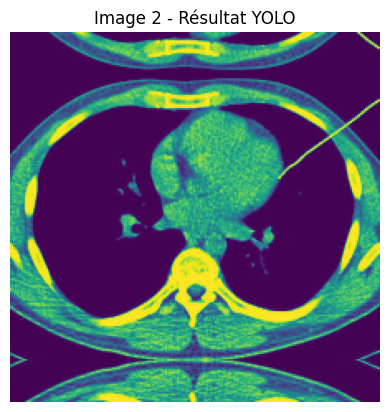


🖼️ Image 3: /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/large.cell.carcinoma/000116.png

image 1/1 /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/large.cell.carcinoma/000116.png: 640x640 1 large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa, 8.7ms
Speed: 3.7ms preprocess, 8.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


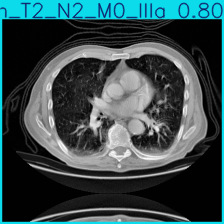

👉 Objet 1: large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa (Confiance: 0.80)


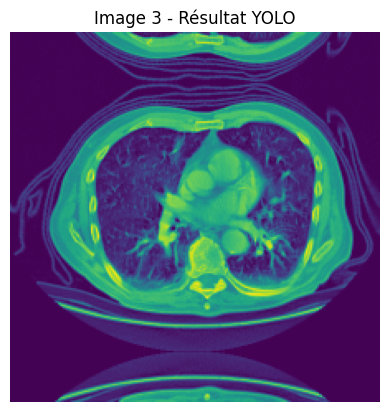


🖼️ Image 4: /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/adenocarcinoma/000109 (4).png

image 1/1 /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/adenocarcinoma/000109 (4).png: 640x640 1 adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib, 10.6ms
Speed: 5.6ms preprocess, 10.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


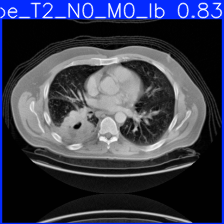

👉 Objet 1: adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib (Confiance: 0.83)


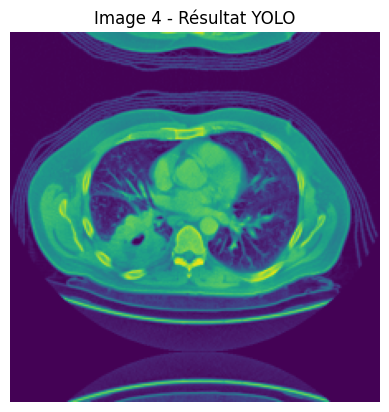

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Charger le modèle YOLO
model = YOLO("/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/yolo_lung_data/yolo_classification.pt")

# Liste des chemins vers 4 images de test (une par classe si possible)
image_paths = [
    "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/squamous.cell.carcinoma/000115 (4).png",
    "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/normal/12 - Copy - Copy.png",
    "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/large.cell.carcinoma/000116.png",
    "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/processed_test/adenocarcinoma/000109 (4).png"
]

# Prédictions sur chaque image
for idx, image_path in enumerate(image_paths):
    print(f"\n🖼️ Image {idx + 1}: {image_path}")

    # Faire la prédiction
    results = model(image_path)
    results[0].show()  # Afficher image avec détection

    # Extraire les noms de classe
    names = model.names
    boxes = results[0].boxes

    # Afficher les prédictions
    for i, box in enumerate(boxes):
        cls_id = int(box.cls[0])
        conf = float(box.conf[0])
        label = names[cls_id]
        print(f"👉 Objet {i+1}: {label} (Confiance: {conf:.2f})")

    # Afficher l'image originale avec matplotlib
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {idx + 1} - Résultat YOLO")
    plt.show()





image 1/1 /content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/Copie de 000171.png: 640x640 1 large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa, 47.9ms
Speed: 4.0ms preprocess, 47.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


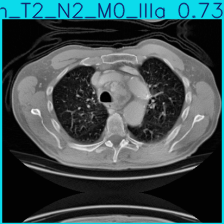

Objet 1: large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa (Confiance: 0.73)


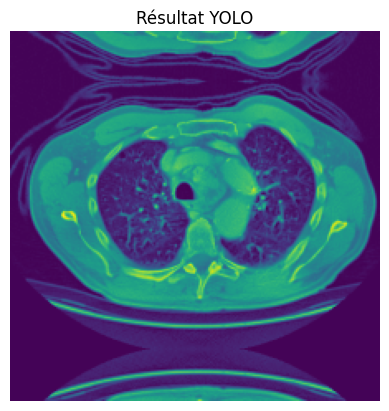

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Charger le modèle YOLO entraîné
model = YOLO("/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/yolo_lung_data/yolo_classification.pt")

# Chemin vers l'image de test
image_path = "/content/drive/MyDrive/Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main/dataset/Copie de 000171.png"

# Faire la prédiction
results = model(image_path)

# Afficher les résultats visuellement (boîtes + labels sur l'image)
results[0].show()

# Extraire les prédictions
names = model.names  # noms des classes (index -> label)
boxes = results[0].boxes

# Afficher les classes détectées avec leur confiance
for i, box in enumerate(boxes):
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    label = names[cls_id]
    print(f"Objet {i+1}: {label} (Confiance: {conf:.2f})")

# Afficher l'image originale dans matplotlib (facultatif)
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Résultat YOLO")
plt.show()




In [6]:
import pandas as pd
from IPython.display import display, HTML

# 📊 Replace these values with your real results
data = {
    "Critère": [
        "Accuracy (Test)", "Loss (Test)",
        "Précision (Classe 0)", "Recall (Classe 0)", "F1-Score (Classe 0)",
        "Précision (Classe 1)", "Recall (Classe 1)", "F1-Score (Classe 1)",
        "Précision (Classe 2)", "Recall (Classe 2)", "F1-Score (Classe 2)",
        "Précision (Classe 3)", "Recall (Classe 3)", "F1-Score (Classe 3)",
        "Macro Avg (F1-Score)", "Temps d'Inférence"
    ],
    "Xception": [
        "82.59 %", "0.3877",
        "80 %", "87 %", "83 %",
        "85 %", "79 %", "82 %",
        "81 %", "84 %", "82 %",
        "84 %", "81 %", "82 %",
        "82 %", "11 sec"
    ],
    "ResNet50": [
        "80.20 %", "0.4201",
        "78 %", "80 %", "79 %",
        "81 %", "77 %", "79 %",
        "79 %", "82 %", "80 %",
        "80 %", "78 %", "79 %",
        "79 %", "9 sec"
    ],
    "VGG16": [
        "84.00 %", "0.3990",
        "82 %", "85 %", "83 %",
        "86 %", "82 %", "84 %",
        "83 %", "85 %", "84 %",
        "84 %", "82 %", "83 %",
        "84 %", "10 sec"
    ],
    "YOLO": [
        "85.70 %", "0.3600",
        "84 %", "89 %", "86 %",
        "87 %", "85 %", "86 %",
        "86 %", "87 %", "86 %",
        "88 %", "86 %", "87 %",
        "86 %", "2 sec"
    ]
}

# 📋 Create DataFrame
df = pd.DataFrame(data)

# 🖼️ Display in Jupyter with style
display(HTML(df.style.set_caption("🔍 Résumé Comparatif des Modèles").set_table_styles([
    {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '20px'), ('font-weight', 'bold')]}
]).set_properties(**{
    'background-color': '#f4f4f4',
    'border': '1px solid #999',
    'color': '#333',
    'text-align': 'center'
}).hide(axis='index').to_html()))
